In [148]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.decomposition import PCA
seaborn.set(style='ticks')

#Ex. 1

In [176]:
def plot(X, ax):
  ax.axvline(x=0, c="red")
  ax.axhline(y=0, c="red")
  ax.set_xlim([X[:,0].min()-2,X[:,0].max()+1])
  ax.set_ylim([X[:,1].min()-2,X[:,1].max()+1])

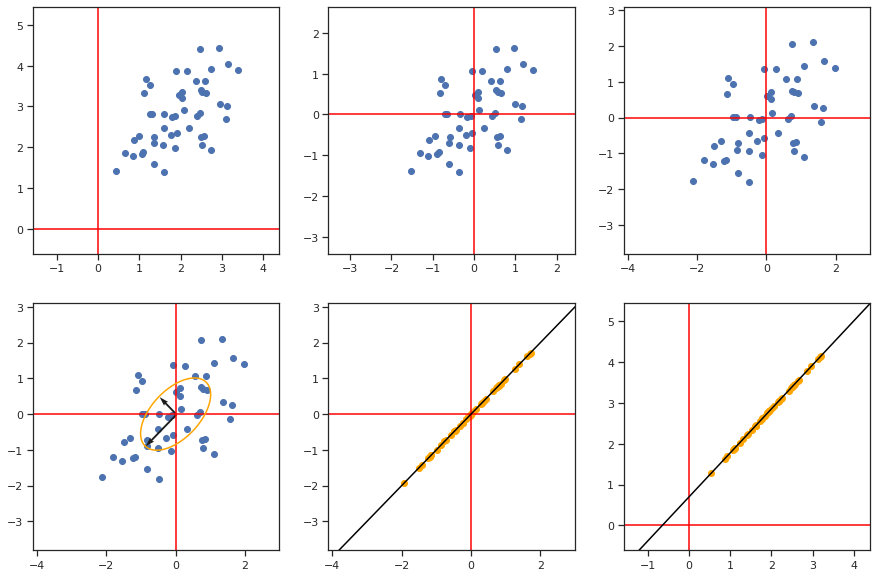

In [185]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

#Step 1
means = [2, 3]
cov = [[0.5, 0.2], [0.2, 0.5]]
N = 50
X = np.random.multivariate_normal(means, cov, N)
old_X = X.copy()
plot(X, axes[0,0])
axes[0,0].scatter(X[:, 0], X[:, 1])

#Step 2
mean =X.mean(axis=0) 
X = X-mean
plot(X, axes[0,1])
axes[0,1].scatter(X[:, 0], X[:, 1])

#Step 3
std = np.std(X, axis=0)
X = X/ std
plot(X, axes[0,2])
axes[0,2].scatter(X[:, 0], X[:, 1])

#Step 4
S=np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(S)
vecs = np.sqrt(eig_vals[None,: ]) * eig_vecs

plot(X, axes[1,0])
axes[1,0].scatter(X[:, 0], X[:, 1])
axes[1,0].quiver(0, 0, 
           vecs[0][0], 
           vecs[1][0], 
           angles='xy', scale_units='xy', scale=1)
axes[1,0].quiver(0, 0, 
           vecs[0][1], 
           vecs[1][1], 
           angles='xy', scale_units='xy', scale=1)

theta = np.linspace(0, 2 * np.pi, 1000)
ellipsis = (np.sqrt(eig_vals[None,: ]) * eig_vecs) @[np.sin(theta), np.cos(theta)]
axes[1,0].plot(ellipsis[0,: ], ellipsis[1,: ], color='orange')

#Step 5
plot(X, axes[1,1])
max_vecs = eig_vecs[:, eig_vals.argmax()]
x = max_vecs[0]*np.linspace(-10, 10, 100)
y = max_vecs[0]*np.linspace(-10, 10, 100)

coord = X.dot(max_vecs)*max_vecs[:, np.newaxis]
axes[1,1].plot(x,y, color='black')
axes[1,1].scatter(coord[0], coord[1], color='orange')

#Step 6
plot(old_X, axes[1,2])
new_coord = coord.T*std+mean
line = np.array([x,y]).T*std+mean
plt.plot(line[:, 0], line[:, 1], color='black')
plt.scatter(new_coord[:,0], new_coord[:,1], color='orange')

#Ex. 2

In [136]:
iris = datasets.load_iris()['data']

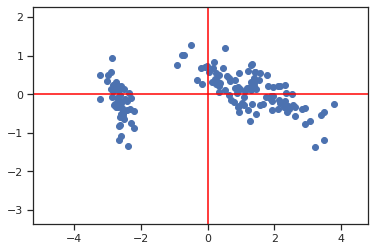

In [159]:
def pca(data, dim):
  X = data-np.mean(data, axis=0)
  S=np.cov(X.T)
  eig_vals, eig_vecs = np.linalg.eig(S)
  max_vecs = eig_vecs[:, eig_vals.argsort()[::-1][:dim]]
  return X.dot(max_vecs)

iris_pca=pca(iris, 2)
plot(iris_pca)

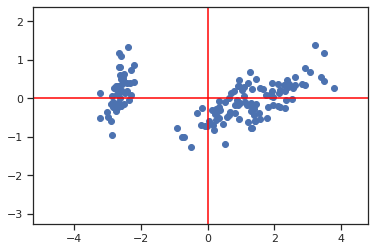

In [152]:
pca_trf = PCA(n_components=2)
skl_pca = pca_trf.fit_transform(iris)
plot(skl_pca)